In [4]:
import pandas as pd

In [5]:
data_path = "../data/creditcard.csv"
raw_data = pd.read_csv(data_path)
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
raw_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
frauds_rate = round(raw_data['Class'].value_counts()[1]/len(raw_data) * 100, 2)
print('Frauds', frauds_rate, '% of the dataset')

Frauds 0.17 % of the dataset


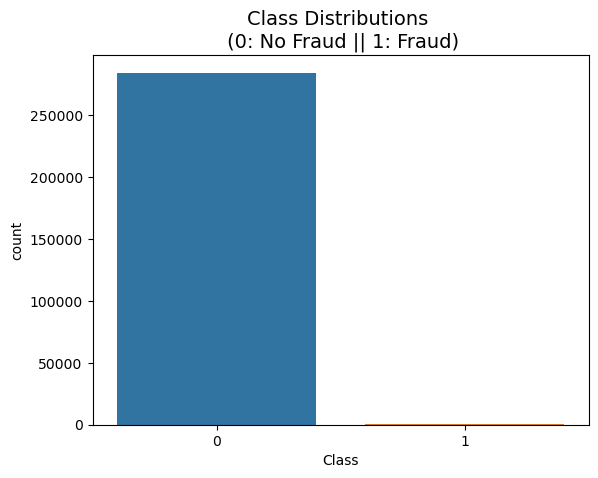

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Class', data=raw_data)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

In [9]:
X = raw_data.iloc[:, 1:-1]
y = raw_data.iloc[:, -1]

X.shape, y.shape

((284807, 29), (284807,))

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17, stratify=y)

In [11]:
import numpy as np

print(np.unique(y_train, return_counts=True)[1][1] / len(y_train) * 100, '%')

0.17254870488152324 %


In [12]:
print(np.unique(y_test, return_counts=True)[1][1] / len(y_test) * 100, '%')

0.17321489179921118 %


## 단순 무식한 첫 도전

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)

    return acc, pre, re, f1, auc

In [14]:
from sklearn.metrics import confusion_matrix

def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)

    print('=> confusion matrix')
    print(confusion)
    print('=============')

    print('Accuracy: {0:.4f}, Precision: {1:.4f}'.format(acc, pre))
    print('Recall: {0:.4f}, F1: {1:.4f}, AUC: {2:.4f}'.format(re, f1, auc))

In [16]:
np.unique(y_test, return_counts=True)

(array([0, 1], dtype=int64), array([85295,   148], dtype=int64))

In [15]:
%%time

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=17, solver='liblinear')
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

print_clf_eval(y_test, lr_pred)

=> confusion matrix
[[85279    16]
 [   53    95]]
Accuracy: 0.9992, Precision: 0.8559
Recall: 0.6419, F1: 0.7336, AUC: 0.8209
CPU times: total: 3.23 s
Wall time: 6.93 s


In [19]:
%%time

from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=17, max_depth=4)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

=> confusion matrix
[[85271    24]
 [   31   117]]
Accuracy: 0.9994, Precision: 0.8298
Recall: 0.7905, F1: 0.8097, AUC: 0.8951
CPU times: total: 3.12 s
Wall time: 9.28 s


In [20]:
%%time

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=17, n_jobs=-1, n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

=> confusion matrix
[[85291     4]
 [   34   114]]
Accuracy: 0.9996, Precision: 0.9661
Recall: 0.7703, F1: 0.8571, AUC: 0.8851
CPU times: total: 8min 37s
Wall time: 1min 52s


In [21]:
%%time

from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(random_state=17, n_jobs=-1, n_estimators=1000, num_leaves=64, boost_from_average=False)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

print_clf_eval(y_test, lgbm_pred)

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024413 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

## 한걸음 전진~!

In [22]:
def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    return get_clf_eval(y_test, pred)

In [23]:
def get_result_pd(models, model_names, X_train, y_train, X_test, y_test):
    col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    tmp = []

    for model in models:
        tmp.append(get_result(model, X_train, y_train, X_test, y_test))

    return pd.DataFrame(tmp, columns=col_names, index=model_names)

In [28]:
%%time

models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'LightGBM']

result = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030866 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

In [29]:
result

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.999192,0.855856,0.641892,0.733591,0.820852
DecisionTree,0.999356,0.829787,0.790541,0.809689,0.895130
RandomForest,0.999555,0.966102,0.770270,0.857143,0.885112
LightGBM,0.999625,0.983333,0.797297,0.880597,0.898637


## 두 번째 도전
- Scaling에 집중!

C:\Users\tmdck\AppData\Local\Temp\ipykernel_8632\2172801377.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data['Amount'], color='r')


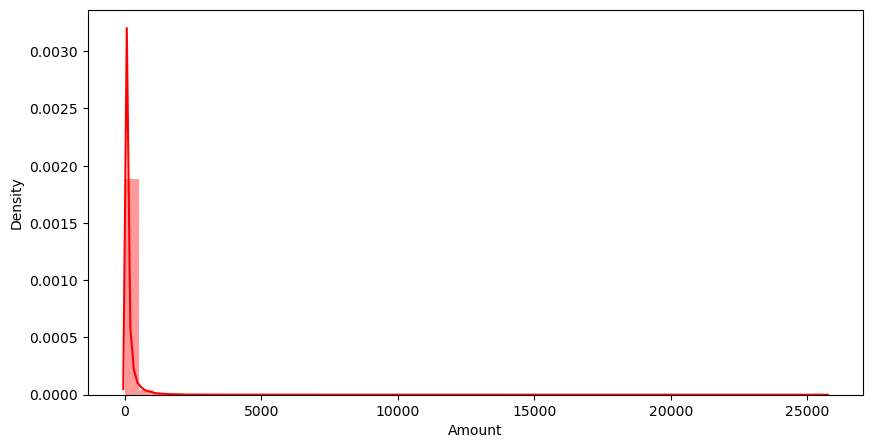

In [30]:
plt.figure(figsize=(10, 5))
sns.distplot(raw_data['Amount'], color='r')

plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
amount_n = scaler.fit_transform(raw_data['Amount'].values.reshape(-1, 1))

raw_data_copy = raw_data.iloc[:, 1:-2]
raw_data_copy['Amount_Scaled'] = amount_n
raw_data_copy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


C:\Users\tmdck\AppData\Local\Temp\ipykernel_8632\1700551168.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data_copy['Amount_Scaled'], color='r')


<Axes: xlabel='Amount_Scaled', ylabel='Density'>

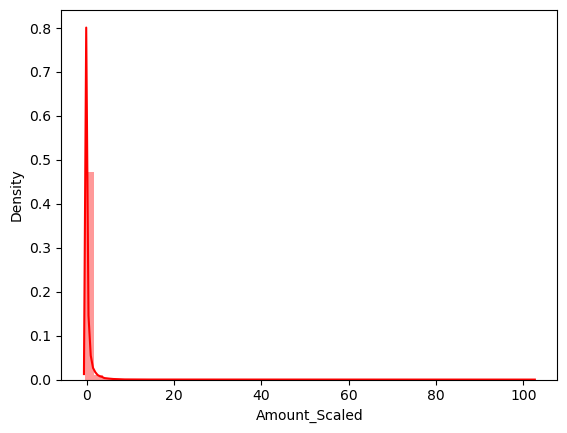

In [48]:
sns.distplot(raw_data_copy['Amount_Scaled'], color='r')

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(raw_data_copy, y, test_size=0.3, random_state=17, stratify=y)

In [33]:
%%time

models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'LightGBM']

result = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

result

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025318 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.999204,0.857143,0.648649,0.738462,0.824231
DecisionTree,0.999356,0.829787,0.790541,0.809689,0.895130
RandomForest,0.999555,0.966102,0.770270,0.857143,0.885112
LightGBM,0.999649,0.991667,0.804054,0.888060,0.902021


In [46]:
from sklearn.metrics import roc_curve

def draw_roc_curve(models, model_names, X_test, y_test):
    plt.figure(figsize=(10, 10))

    for model in range(len(models)):
        pred = models[model].predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, pred)
        plt.plot(fpr, tpr, label=model_names[model])

    plt.plot([0,1], [0,1], 'k--', label='random quess')
    plt.title('ROC')
    plt.legend()
    plt.grid()
    plt.show()

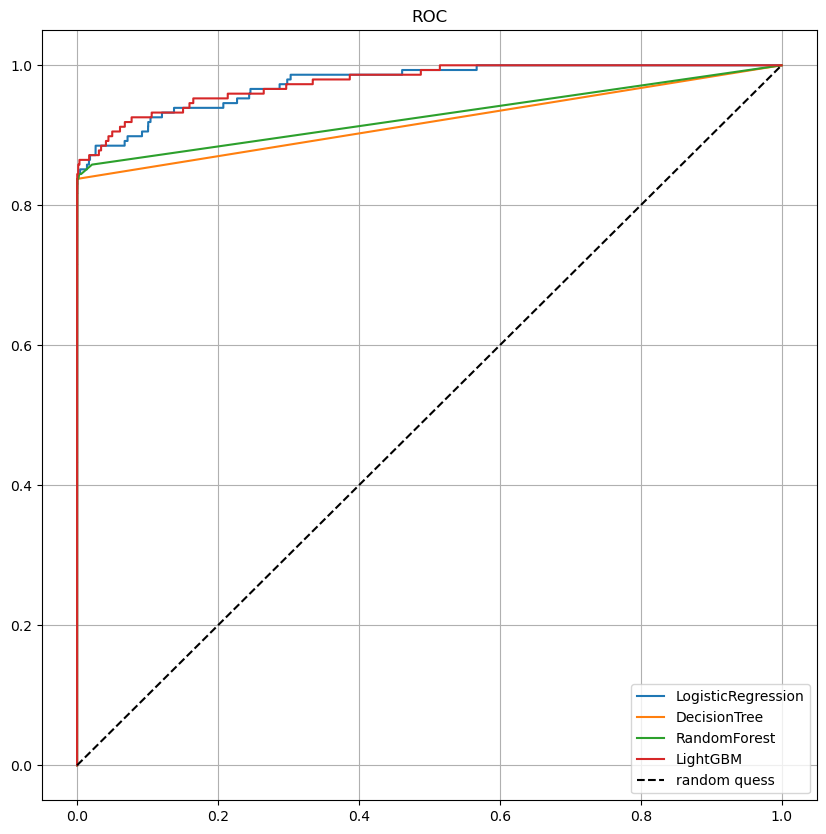

In [47]:
draw_roc_curve(models, model_names, X_test, y_test)

### 또다른 시도 : log scale

In [49]:
amount_log = np.log1p(raw_data['Amount'])

raw_data_copy['Amount_Scaled'] = amount_log

C:\Users\tmdck\AppData\Local\Temp\ipykernel_8632\1700551168.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data_copy['Amount_Scaled'], color='r')


<Axes: xlabel='Amount_Scaled', ylabel='Density'>

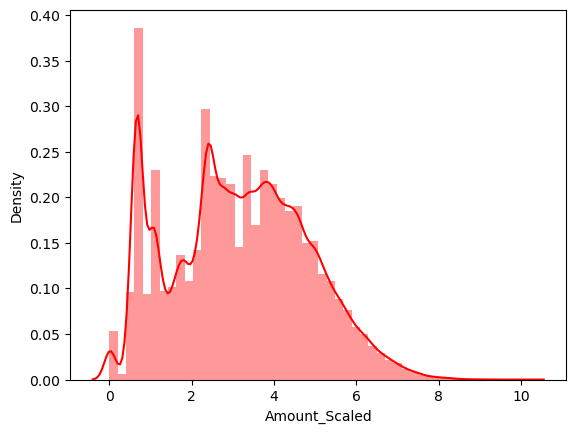

In [50]:
sns.distplot(raw_data_copy['Amount_Scaled'], color='r')

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(raw_data_copy, y, test_size=0.3, random_state=17, stratify=y)

In [52]:
%%time

models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'LightGBM']

result = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

result

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025404 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.999181,0.848214,0.641892,0.730769,0.820846
DecisionTree,0.999356,0.829787,0.790541,0.809689,0.895130
RandomForest,0.999555,0.966102,0.770270,0.857143,0.885112
LightGBM,0.999625,0.983333,0.797297,0.880597,0.898637


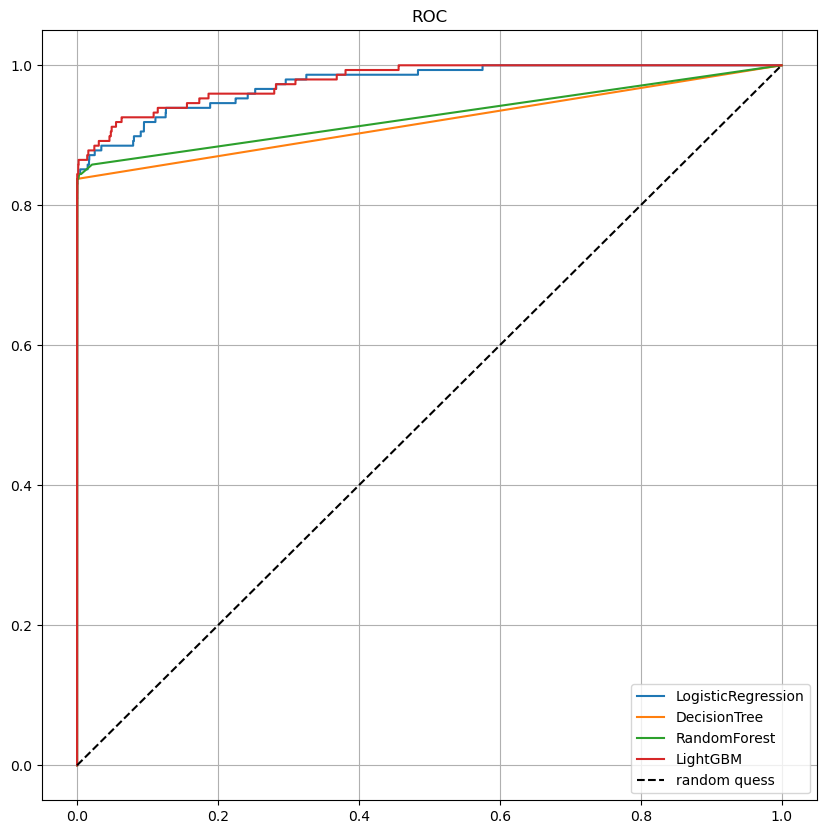

In [53]:
draw_roc_curve(models, model_names, X_test, y_test)

## 세 번째 도전

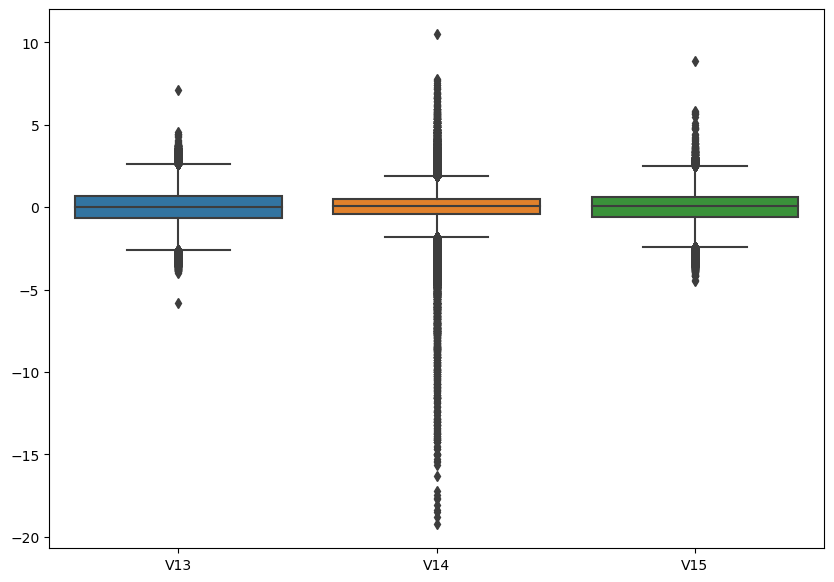

In [54]:
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.boxplot(data=raw_data[['V13', 'V14', 'V15']]);

In [55]:
def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index

    return outlier_index

In [56]:
get_outlier(df=raw_data, column='V14')

Index([8296, 8615, 9035, 9252], dtype='int64')

In [57]:
outlier_index = get_outlier(df=raw_data, column='V14')
raw_data_copy.drop(outlier_index, axis=0, inplace=True)
raw_data_copy.shape

(284803, 29)

In [58]:
X = raw_data_copy

raw_data.drop(outlier_index, axis=0, inplace=True)
y = raw_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17, stratify=y)

In [59]:
%%time

models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'LightGBM']

result = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

result

[LightGBM] [Info] Number of positive: 342, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026351 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199362, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.999239,0.858407,0.664384,0.749035,0.832098
DecisionTree,0.999403,0.880000,0.753425,0.811808,0.876624
RandomForest,0.999567,0.957983,0.780822,0.860377,0.890382
LightGBM,0.999661,0.983471,0.815068,0.891386,0.907523


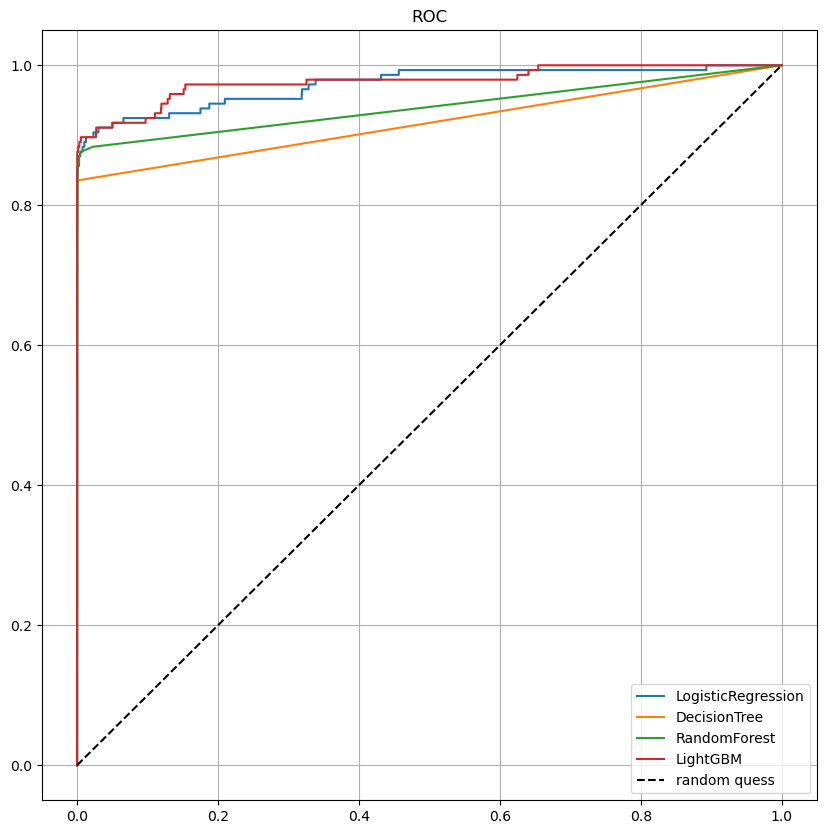

In [60]:
draw_roc_curve(models, model_names, X_test, y_test)

## 네 번째 도전

In [61]:
%pip install imbalanced-learn

   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.0 kB ? eta -:--:--
   --------- ----------------------------- 61.4/258.0 kB 469.7 kB/s eta 0:00:01
   ---------------------------------------- 258.0/258.0 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [62]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=17)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [63]:
X_train.shape, y_train.shape

((199362, 29), (199362,))

In [64]:
X_train_over.shape, y_train_over.shape

((398040, 29), (398040,))

In [65]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_train_over, return_counts=True))

(array([0, 1], dtype=int64), array([199020,    342], dtype=int64))
(array([0, 1], dtype=int64), array([199020, 199020], dtype=int64))


In [66]:
%%time

models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'LightGBM']

result = get_result_pd(models, model_names, X_train_over, y_train_over, X_test, y_test)

result

[LightGBM] [Info] Number of positive: 199020, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.057127 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 398040, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.973549,0.055509,0.904110,0.104596,0.938889
DecisionTree,0.948608,0.029275,0.904110,0.056713,0.926397
RandomForest,0.999555,0.921875,0.808219,0.861314,0.904051
LightGBM,0.930911,0.021128,0.869863,0.041254,0.900439


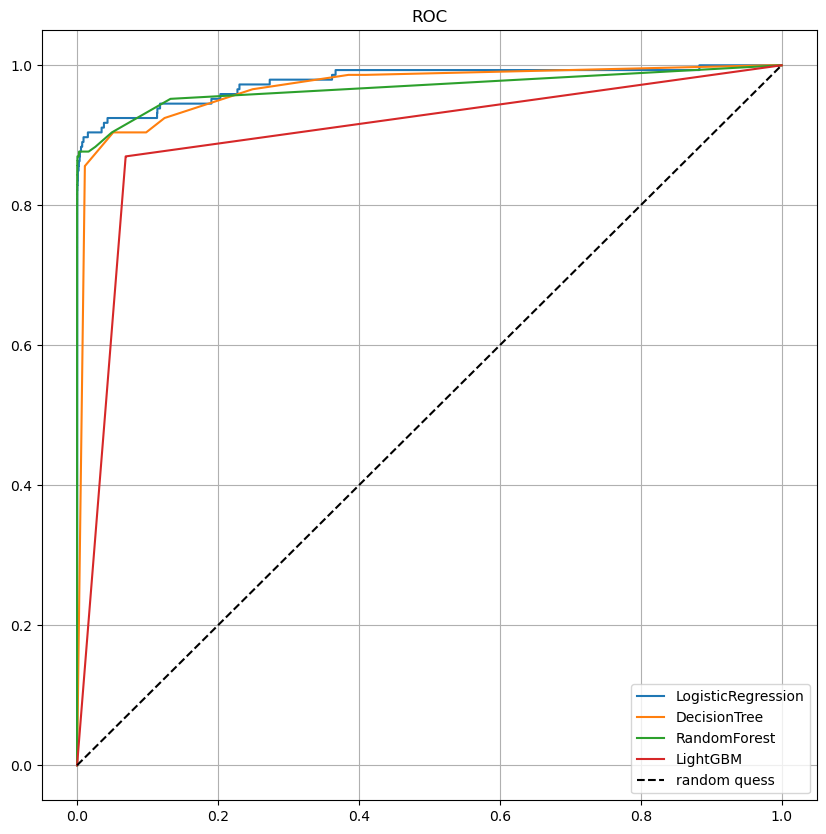

In [67]:
draw_roc_curve(models, model_names, X_test, y_test)